# Red Wine Quality Prediction Project

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

In [51]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report,r2_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Dataset
df = pd.read_csv('winequality-red.csv')

In [3]:
#Check the dataframe
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Check shape of dataframe
df.shape

(1599, 12)

In [5]:
# Check column name
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
# Check the information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


As we can see the information of the dataframe there are 12 columns and 1599 rows in our dataframe.
all 11 columns are of float64 datatype and 1 column i.e('quality') is of int64 datatype.

In [7]:
# Check the null value in each column
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There is no null value in a single column in dataframe.

In [11]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [15]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

<Axes: ylabel='count'>

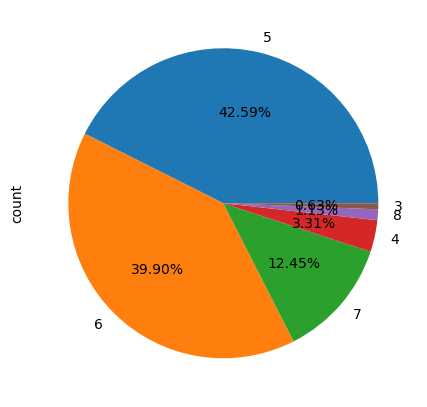

In [18]:
plt.figure(1, figsize=(5,7))
df['quality'].value_counts().plot.pie(autopct="%1.2f%%")

In [20]:
# checking the value count for each column
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

fixed acidity
7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: count, Length: 96, dtype: int64


volatile acidity
0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: count, Length: 143, dtype: int64


citric acid
0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: count, Length: 80, dtype: int64


residual sugar
2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: count, Length: 91, dtype: int64


chlorides
0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: count, Length: 153, dtype: int64


free sulfur dioxide
6.0     138
5.0     104
10.0     79
15.0     78
12

As we can see in quality there are 6 categories so we have to convert it into binary in 0's and 1's as we are working on classification model for that we need categorical column.

In [28]:
# converting > 6 value into 1 and remaining into 0.
df['quality'] = np.where(df['quality'] > 5, 1, df['quality'] )
df['quality'] = np.where(df['quality'] != 1, 0,  df['quality'])

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [29]:
df['quality'].unique()

array([0, 1], dtype=int64)

In [30]:
df['quality'].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

In [34]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


we describe our dataset and as we can see here all the column having continous data insted of quality because that is our target column.

In our dataset free sulfur dioxide and total sulfur dioxide we can see some outliers in this 2 columns. first we have to check our data is normally distributed or not.

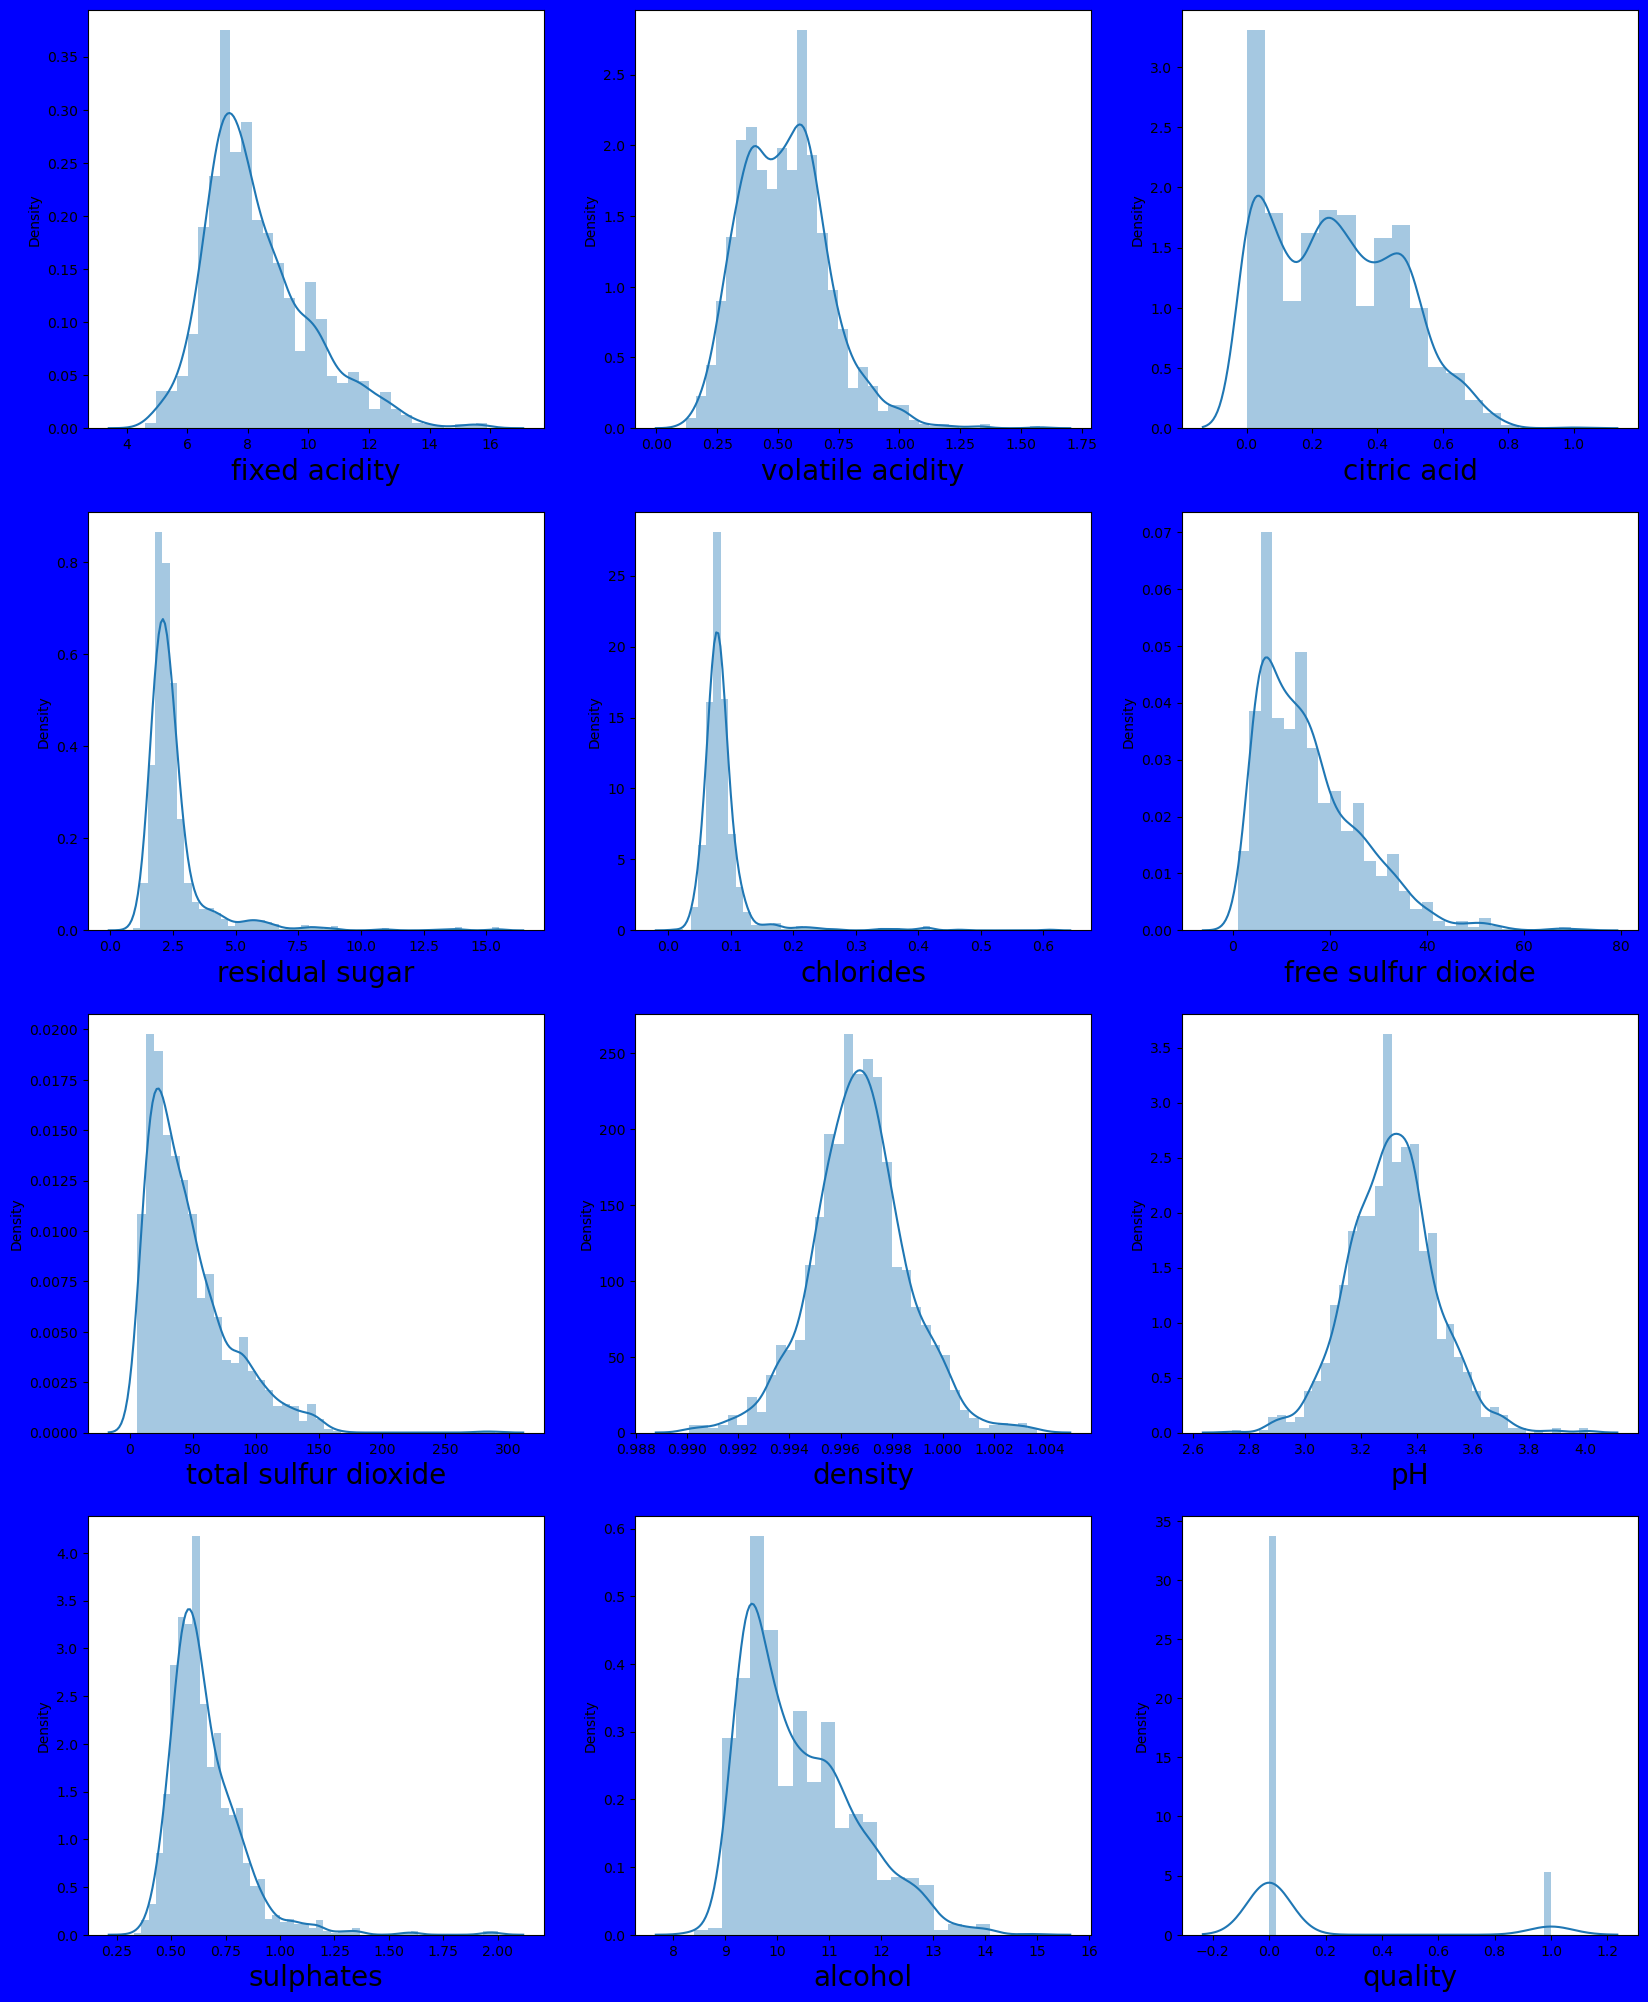

In [35]:
# check the skewness
plt.figure(figsize = (20 ,25),facecolor = 'blue')
plotnumber = 1

for column in df:
    if plotnumber <= 12: #as there are 9 column
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber+=1
plt.show()

In dist plot we see skewness in almost all the columns so we have to fix this skewness.

As we mainsion above that our quality is our target variable so we don't have to see the outliers.

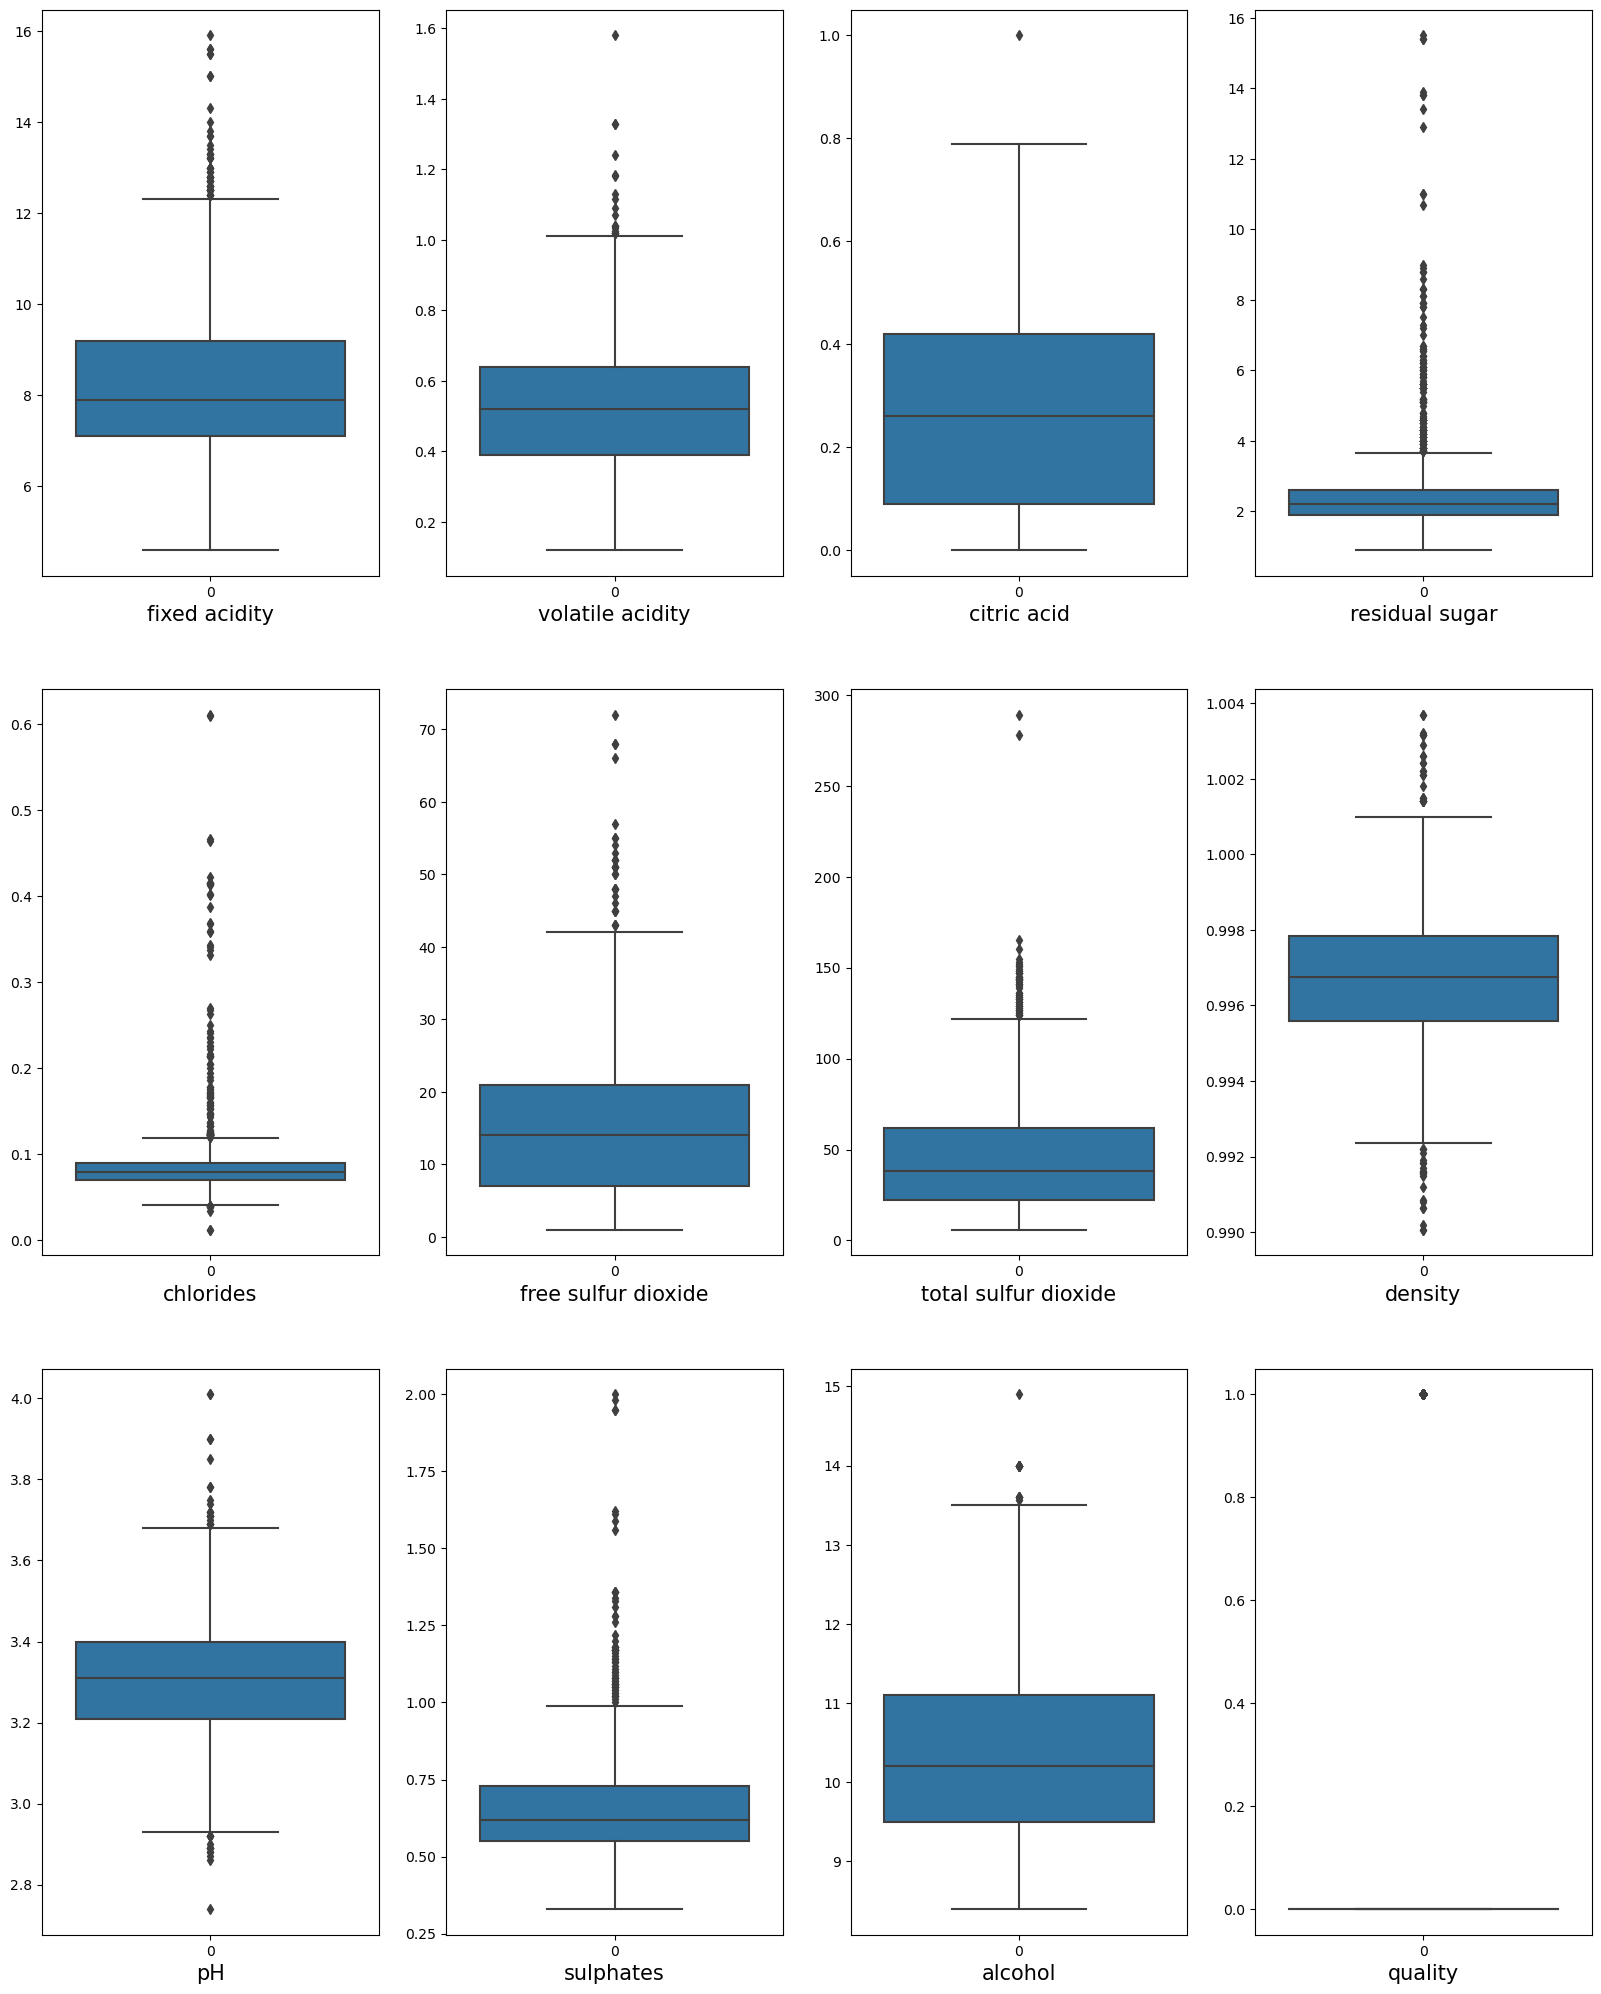

In [38]:
#visualize the outliers using boxplot
plt.figure(figsize = (20,25))
graph = 1

for column in df:
    if graph <= 12:
        plt.subplot(3,4,graph)
        ax = sns.boxplot(data = df[column])
        plt.xlabel(column, fontsize = 15)
    graph+=1
plt.show()

we see that overall data has some outliers if we handel that we may loss more information from dataset so now we will check corelation and do further step.

# Co-relation

<Axes: >

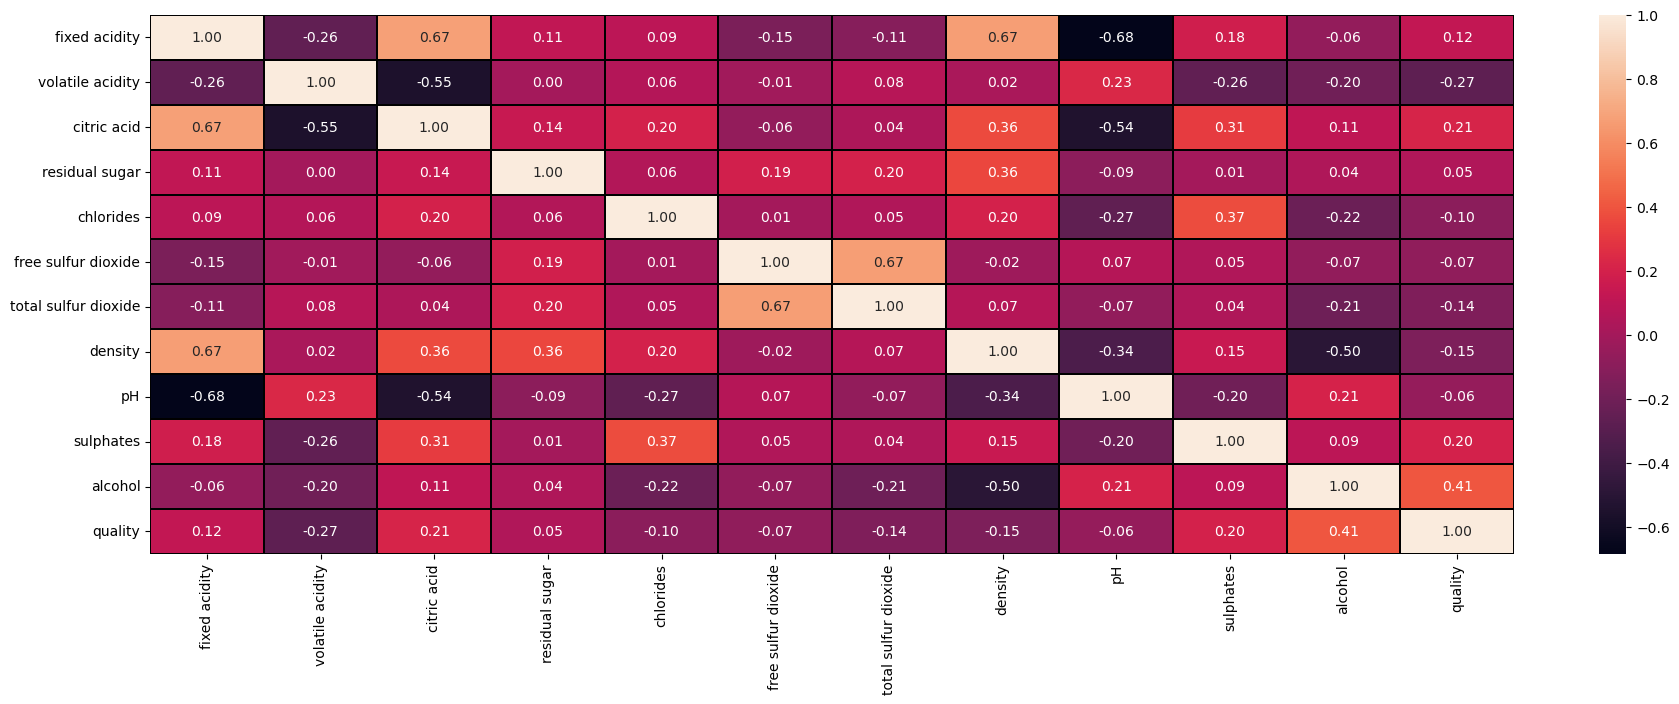

In [39]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt='0.2f')

we observe in the heatmap we don't see much coleanarity in feature and label data so we can move further.

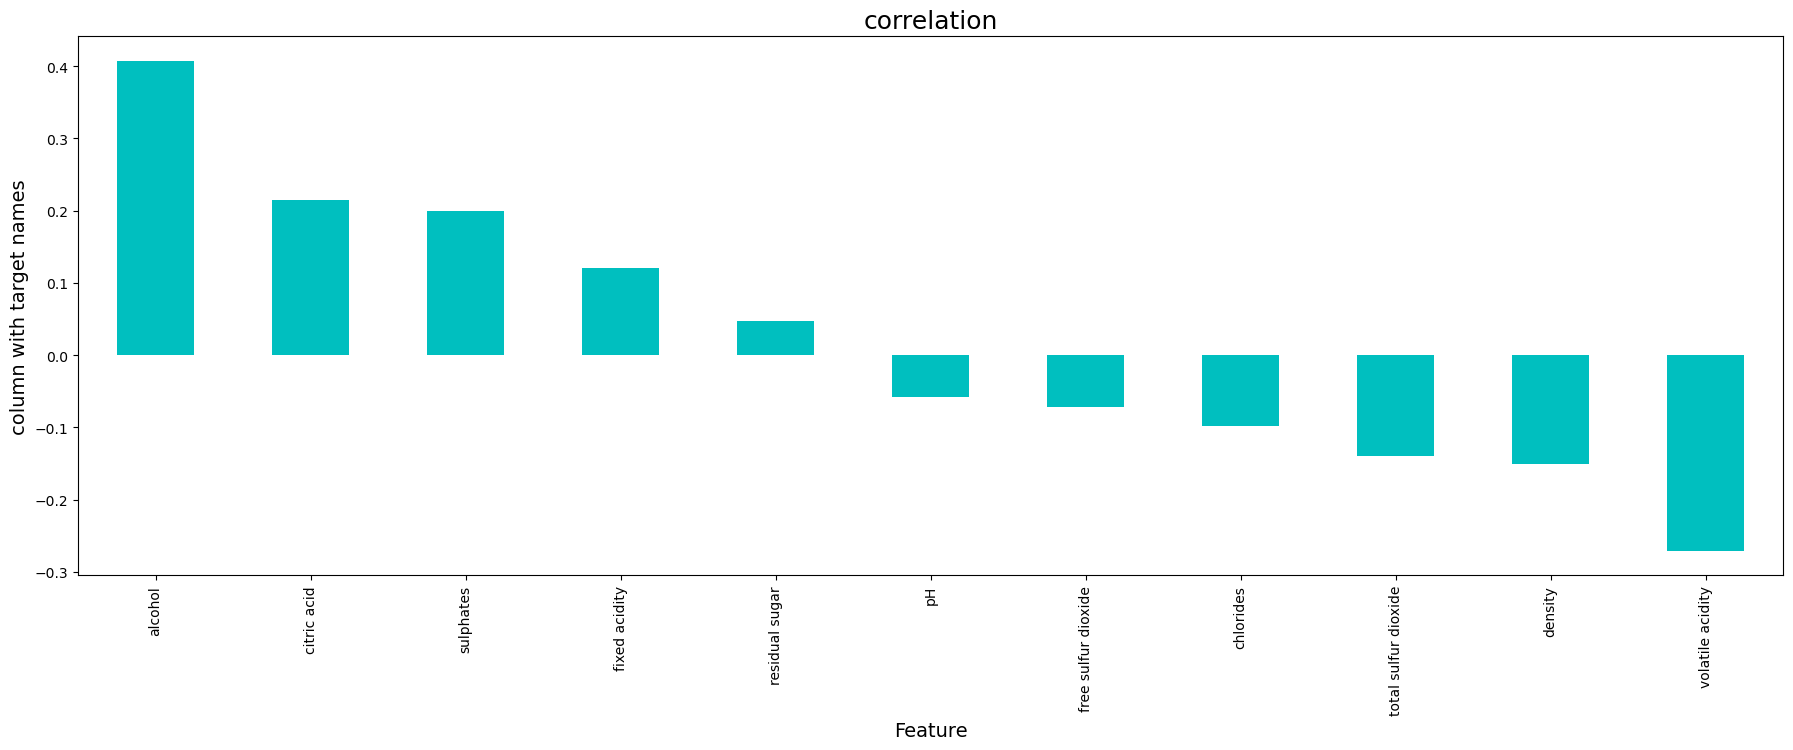

In [40]:
plt.figure(figsize=(22,7))
df.corr()['quality'].sort_values(ascending=False).drop(['quality']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

here we can see properly that alcohol, citiric acid, sulphates, fixed sugar having positive relation with label

on the other hand pH, free sulfur dioxide, chlorides, total sulfur dioxide, density, volatile acidity having negative relation with the label.

In [41]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 2.129363
dtype: float64

If we keep range -+0.5 then many columns are not lying on range.

Since , we have very few columns and almost 7 columns are have high skewness we will not be able to remove them , as said earlier there are outliers in the data but as the no. of data is very less we will not remove any data and any skewness we will not treat that

In [43]:
df.shape

(1599, 12)

In [44]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
          45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
         106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
         151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
         244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
         354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
         467,  480,  480,  494,  515,  544,  554,  554,  555,  555,  557,
         557,  568,  584,  588,  591,  595,  608,  614,  636,  639,  649,
         649,  651,  652,  652,  652,  672,  672,  684,  690,  692,  692,
         695,  723,  724,  730,  754,  776,  777,  795,  821,  836,  837,
         889,  911,  917,  923,  925,  926,  982, 1017, 1018, 1043, 1051,
        1051, 1071, 1074, 1079, 1079, 1081, 1081, 1111, 1114, 1131, 1154,
        1165, 1175, 1186, 1231, 1235, 1244, 1244, 1244, 1260, 1269, 1269,
        1270, 1270, 1288, 1289, 1295, 

Here we considered threshold value as 3 and find z-score

In [45]:
df_zscore = df[(z<3).all(axis=1)]
df_zscore

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [46]:
#Check loss of data 
data_loss = ((1599-1458)/1599)*100

In [47]:
data_loss

8.818011257035648

By checking z-score our data loss is 8.81 percent which is acceptable so now we will move further.

# Seperating data into features and label

In [48]:
X = df_zscore.drop(['quality'],axis=1)
y = df_zscore['quality']

In [49]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [50]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1458, dtype: int64

# Scaling data using standard scaler

In [52]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [53]:
X_scaled.shape[1]

11

In [54]:
X_scaled

array([[-0.55404532,  1.0387081 , -1.38741253, ...,  1.37476832,
        -0.63538217, -0.99657302],
       [-0.31118983,  2.10132549, -1.38741253, ..., -0.82375195,
         0.2897715 , -0.60491468],
       [-0.31118983,  1.39291389, -1.17821377, ..., -0.3982319 ,
         0.05848308, -0.60491468],
       ...,
       [-1.22189791, -0.0829436 , -0.70751654, ...,  0.73648824,
         0.82944447,  0.57006031],
       [-1.4647534 ,  0.71401945, -0.75981623, ...,  1.80028837,
         0.52105991, -0.21325635],
       [-1.40403953, -1.26362959,  1.07067297, ...,  0.52372821,
         0.13557922,  0.57006031]])

# Model Training

In [55]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=355)

# Model Building

# Logestic Regression

In [56]:
from sklearn.linear_model import LogisticRegression

In [65]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [66]:
test_pred = lr.predict(x_test)
test_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,

In [67]:
train_pred = lr.predict(x_train)
train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [70]:
# function we are using for all the model for checking metrics
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred = clf.predict(x_train)
        
        print("\n===============================Train Result=============================")
        
        print(f"Accuracy score : {accuracy_score(y_train,y_pred) * 100: .2f}%")
        
    elif train == False:
        pred = clf.predict(x_test)
        
        print("\n===============================Test Result===============================")
        print(f"Accuracy Scorre : {accuracy_score(y_test,pred) * 100: .2f}%")
        
        
        print ('\n \n Test Classification Report \n', classification_report(y_test, pred, digits = 2))

In [73]:
metric_score(lr,x_train,x_test,y_train,y_test,train=True) # Training Score

metric_score(lr,x_train,x_test,y_train,y_test,train=False) # Testing Score



===============================Train Result=============================
Accuracy score :  88.47%

===============================Test Result===============================
Accuracy Scorre :  87.95%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       313
           1       0.61      0.42      0.50        52

    accuracy                           0.88       365
   macro avg       0.76      0.69      0.72       365
weighted avg       0.87      0.88      0.87       365



In [75]:
predlr = lr.predict(x_test)
print('Accuracy', accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 87.94520547945206
[[299  14]
 [ 30  22]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       313
           1       0.61      0.42      0.50        52

    accuracy                           0.88       365
   macro avg       0.76      0.69      0.72       365
weighted avg       0.87      0.88      0.87       365



we got 87% accuracy using logestic regression.

# Random forest classifier

In [76]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=200)
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)

print('Test Accuracy', accuracy_score(y_test,predrf)*100)

print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Test Accuracy 90.41095890410958
[[306   7]
 [ 28  24]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       313
           1       0.77      0.46      0.58        52

    accuracy                           0.90       365
   macro avg       0.85      0.72      0.76       365
weighted avg       0.90      0.90      0.89       365



In [77]:
metric_score(rf,x_train,x_test,y_train,y_test,train=True) # Training Score

metric_score(rf,x_train,x_test,y_train,y_test,train=False) # Testing Score


===============================Train Result=============================
Accuracy score :  100.00%

===============================Test Result===============================
Accuracy Scorre :  90.41%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       313
           1       0.77      0.46      0.58        52

    accuracy                           0.90       365
   macro avg       0.85      0.72      0.76       365
weighted avg       0.90      0.90      0.89       365



we got 90% accuracy using Random forest.

# Decision tree classifier

In [80]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
pred_traindt=dt.predict(x_train)
print('Test Accuracy', accuracy_score(y_test,preddt)*100)
print('Train Accuracy', accuracy_score(y_train,pred_traindt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Test Accuracy 89.86301369863014
Train Accuracy 100.0
[[297  16]
 [ 21  31]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       313
           1       0.66      0.60      0.63        52

    accuracy                           0.90       365
   macro avg       0.80      0.77      0.78       365
weighted avg       0.89      0.90      0.90       365



In [81]:
metric_score(dt,x_train,x_test,y_train,y_test,train=True) # Training Score

metric_score(dt,x_train,x_test,y_train,y_test,train=False) # Testing Score


===============================Train Result=============================
Accuracy score :  100.00%

===============================Test Result===============================
Accuracy Scorre :  89.86%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       313
           1       0.66      0.60      0.63        52

    accuracy                           0.90       365
   macro avg       0.80      0.77      0.78       365
weighted avg       0.89      0.90      0.90       365



# SVC

In [82]:
from sklearn.svm import SVC

svc= SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)

print('Test Accuracy', accuracy_score(y_test,predsvc)*100)

print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

Test Accuracy 90.13698630136986
[[309   4]
 [ 32  20]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.94       313
           1       0.83      0.38      0.53        52

    accuracy                           0.90       365
   macro avg       0.87      0.69      0.74       365
weighted avg       0.90      0.90      0.89       365



In [83]:
metric_score(svc,x_train,x_test,y_train,y_test,train=True) # Training Score

metric_score(svc,x_train,x_test,y_train,y_test,train=False) # Testing Score


===============================Train Result=============================
Accuracy score :  91.03%

===============================Test Result===============================
Accuracy Scorre :  90.14%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.99      0.94       313
           1       0.83      0.38      0.53        52

    accuracy                           0.90       365
   macro avg       0.87      0.69      0.74       365
weighted avg       0.90      0.90      0.89       365



Here we checked with all model we are getting best result in Random forest classifier.

so we will move ahead with Random Forest Classifier

# Cross Validation of the Model

In [86]:
train_accuracy = r2_score(y_train, train_pred)
test_accuracy = r2_score(y_test, test_pred)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(rf, X, y, cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {train_accuracy}and the accuracy for testing is {test_accuracy}")
    print('\n')

At cross fold 2 the cv score is 0.8580246913580247 and accuracy score for training is 0.02088783983619613and the accuracy for testing is 0.013271073973949332


At cross fold 3 the cv score is 0.8834019204389575 and accuracy score for training is 0.02088783983619613and the accuracy for testing is 0.013271073973949332


At cross fold 4 the cv score is 0.8806469215715791 and accuracy score for training is 0.02088783983619613and the accuracy for testing is 0.013271073973949332


At cross fold 5 the cv score is 0.8724191498375935 and accuracy score for training is 0.02088783983619613and the accuracy for testing is 0.013271073973949332


At cross fold 6 the cv score is 0.8792866941015088 and accuracy score for training is 0.02088783983619613and the accuracy for testing is 0.013271073973949332


At cross fold 7 the cv score is 0.8868269888006731 and accuracy score for training is 0.02088783983619613and the accuracy for testing is 0.013271073973949332


At cross fold 8 the cv score is 0.885463

Since, we check the cross validation we observed that at the cross fold 7 we are getting better result.


Here we handled the overfitting and underfitting by checking the cross validation score.

# Hyper Parameter Tuning

In [87]:
from sklearn.model_selection import GridSearchCV
rf= RandomForestClassifier()

parameters = {'max_features' :['auto','sqrt','log2'],
             'max_depth' :[4,5,6,7,8],
              'criterion' : ['gini', 'entropy'],
              'n_estimators' : [100,200,300,400,500]
             }

GCV = GridSearchCV(estimator =rf,param_grid=parameters,cv=7,scoring='accuracy')
GCV.fit(x_train,y_train) 
GCV.best_params_ #printing the best parameters found by the GridSearchCV

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [88]:
GCV_pred=GCV.best_estimator_.predict(x_test) #predicting with the best parameters
accuracy_score(y_test,GCV_pred) #Checking Final Accuracy

0.8821917808219178

Here, after hyper parameter tuning we are getting 2% less result which is exceptable .

# Saving dataset 

In [89]:
import pickle
filename = 'Wine_prediction.pkl'
pickle.dump(GCV,open(filename,'wb'))

# Final Conclusion

In [90]:
loaded_model = pickle.load(open('Wine_prediction.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result*100)

88.21917808219179


In [91]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],GCV_pred[:]],index=['Predicted','Orignal'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
Predicted,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Orignal,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
